# IMPORT LIBRARIES AND LOADING DATA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,classification_report

In [ ]:
df=pd.read_csv('/content/archive (19).zip')
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [ ]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [ ]:
df.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4
142523,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,2018-11-04,11,4,4


In [ ]:
df.dtypes

film_code         int64
cinema_code       int64
total_sales       int64
tickets_sold      int64
tickets_out       int64
show_time         int64
occu_perc       float64
ticket_price    float64
ticket_use        int64
capacity        float64
date             object
month             int64
quarter           int64
day               int64
dtype: object

In [ ]:
df.date=pd.to_datetime(df.date)
df['month'] = pd.DatetimeIndex(df['date']).month
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   film_code     142524 non-null  int64         
 1   cinema_code   142524 non-null  int64         
 2   total_sales   142524 non-null  int64         
 3   tickets_sold  142524 non-null  int64         
 4   tickets_out   142524 non-null  int64         
 5   show_time     142524 non-null  int64         
 6   occu_perc     142399 non-null  float64       
 7   ticket_price  142524 non-null  float64       
 8   ticket_use    142524 non-null  int64         
 9   capacity      142399 non-null  float64       
 10  date          142524 non-null  datetime64[ns]
 11  month         142524 non-null  int32         
 12  quarter       142524 non-null  int64         
 13  day           142524 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(9)
memory usage: 1

In [ ]:
df.isna().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [ ]:
df['occu_perc']=df['occu_perc'].fillna(df['occu_perc'].mean())
df['capacity']=df['capacity'].fillna(df['capacity'].mean())
df.isna().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

EDA

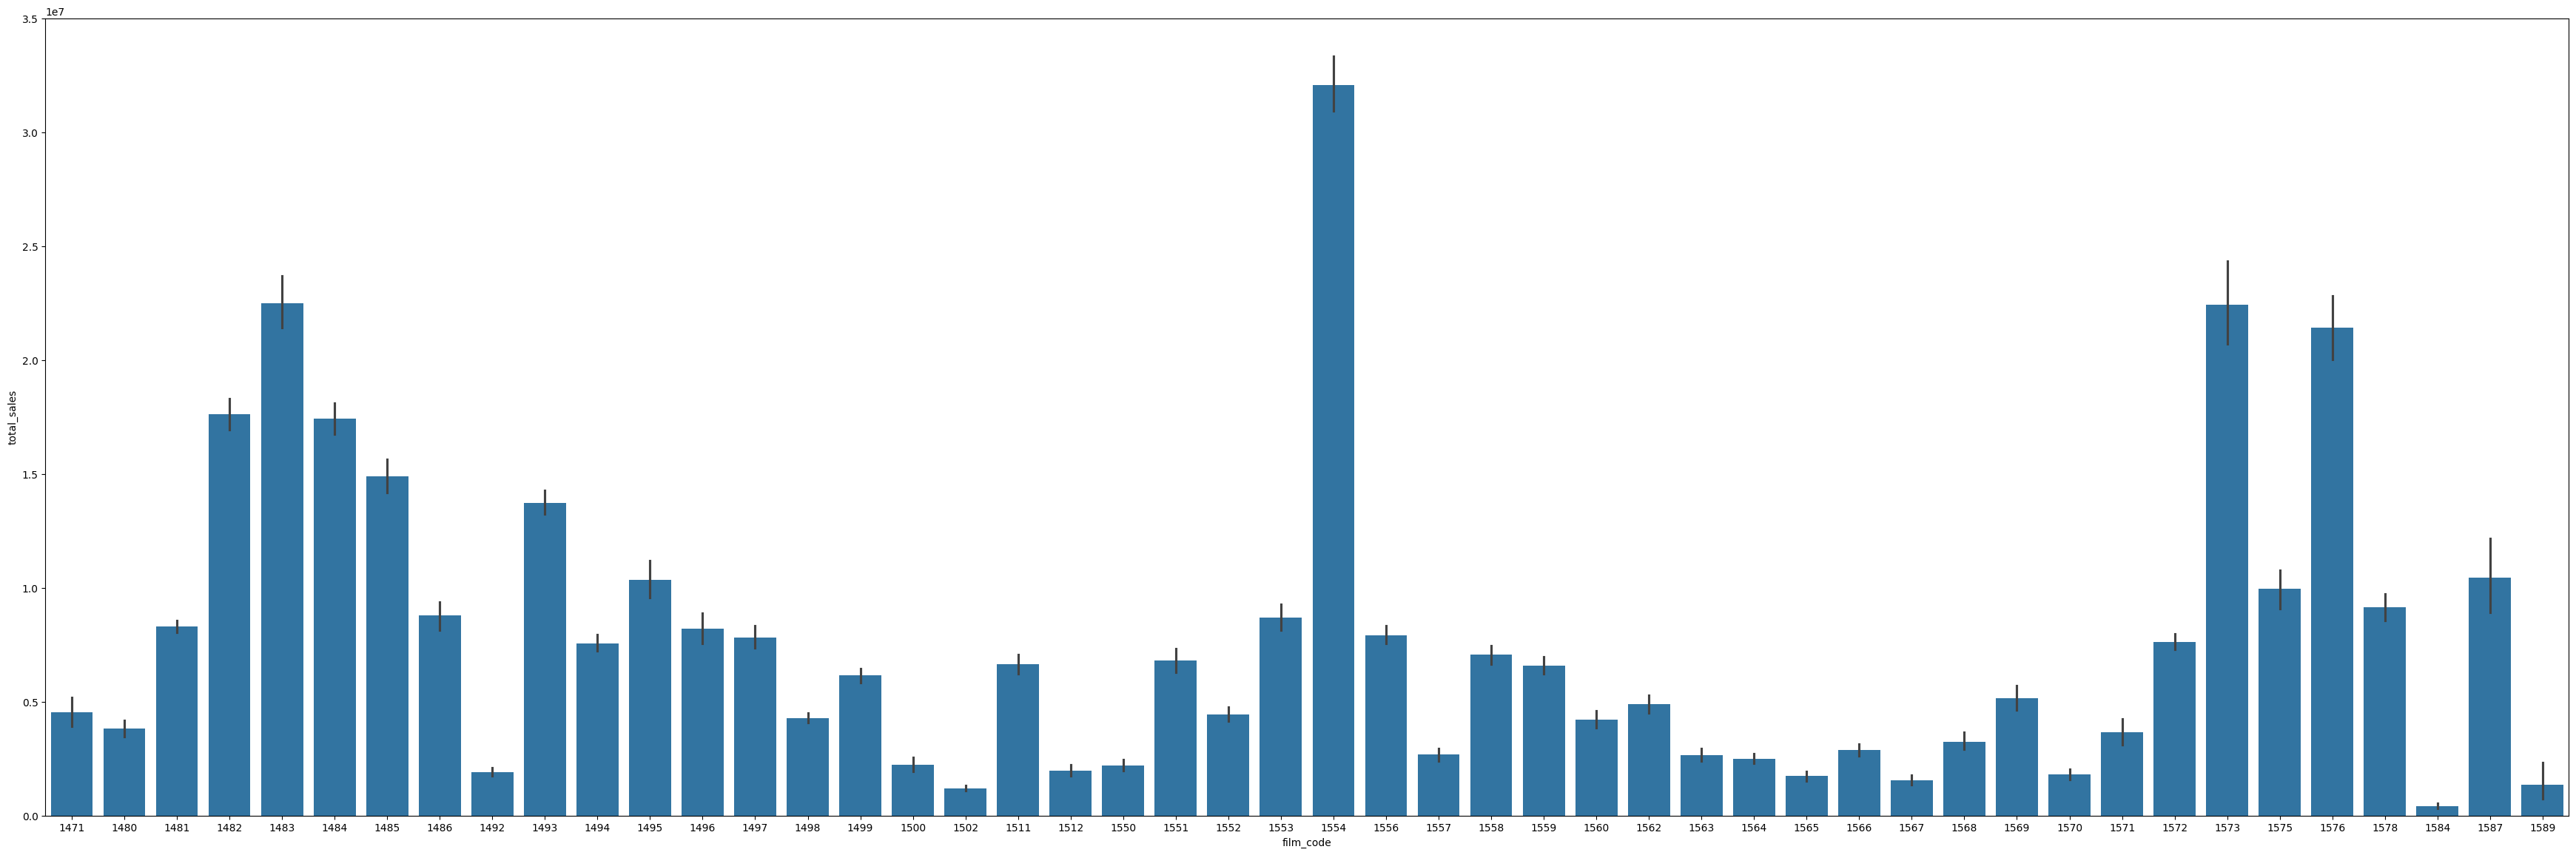

In [ ]:
plt.figure(figsize =(44,14))
sns.barplot(x=df['film_code'],y=df['total_sales'])

plt.show()


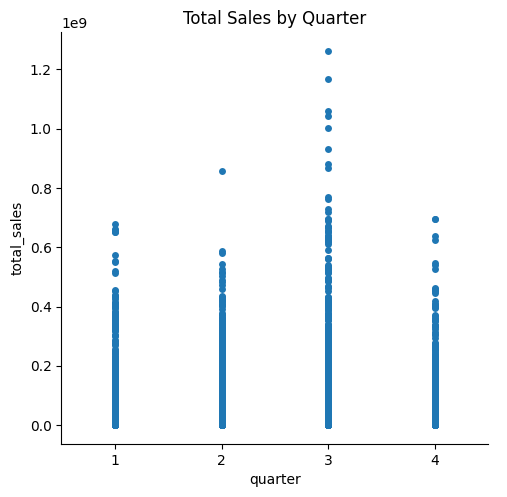

In [ ]:
sns.catplot(x="quarter", y="total_sales", data=df,jitter=False)

plt.title("Total Sales by Quarter")

plt.show()

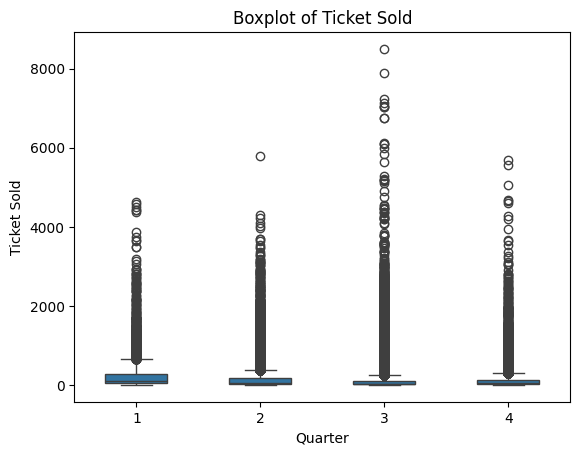

In [ ]:
sns.boxplot( x=df["quarter"], y=df["tickets_sold"],width=0.5)

plt.title("Boxplot of Ticket Sold")
plt.ylabel("Ticket Sold")
plt.xlabel("Quarter")

plt.show()

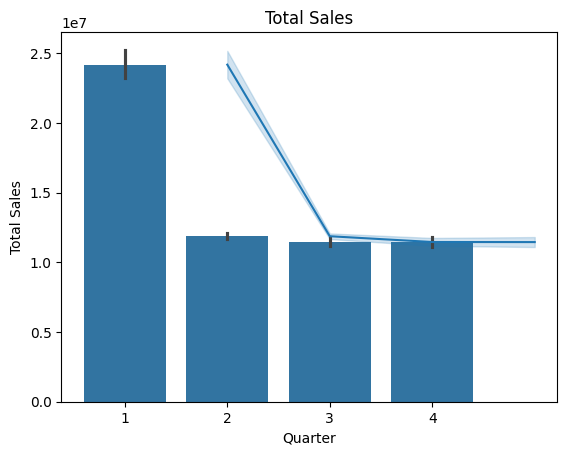

In [ ]:
sns.barplot(x=df['quarter'],y=df['total_sales'])
sns.lineplot(x=df['quarter'],y=df['total_sales'])

plt.title("Total Sales")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.show()

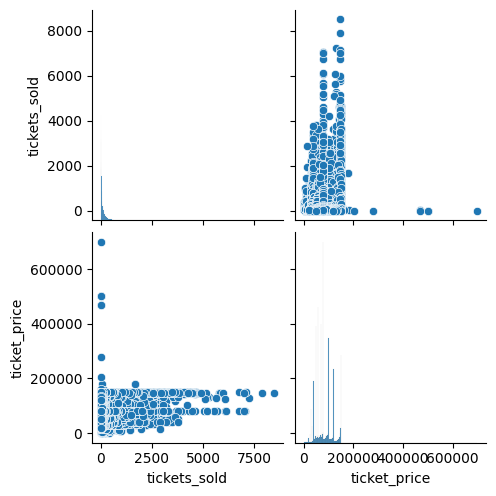

In [ ]:
sns.pairplot(data=df, vars=["tickets_sold", "ticket_price"])

plt.show()

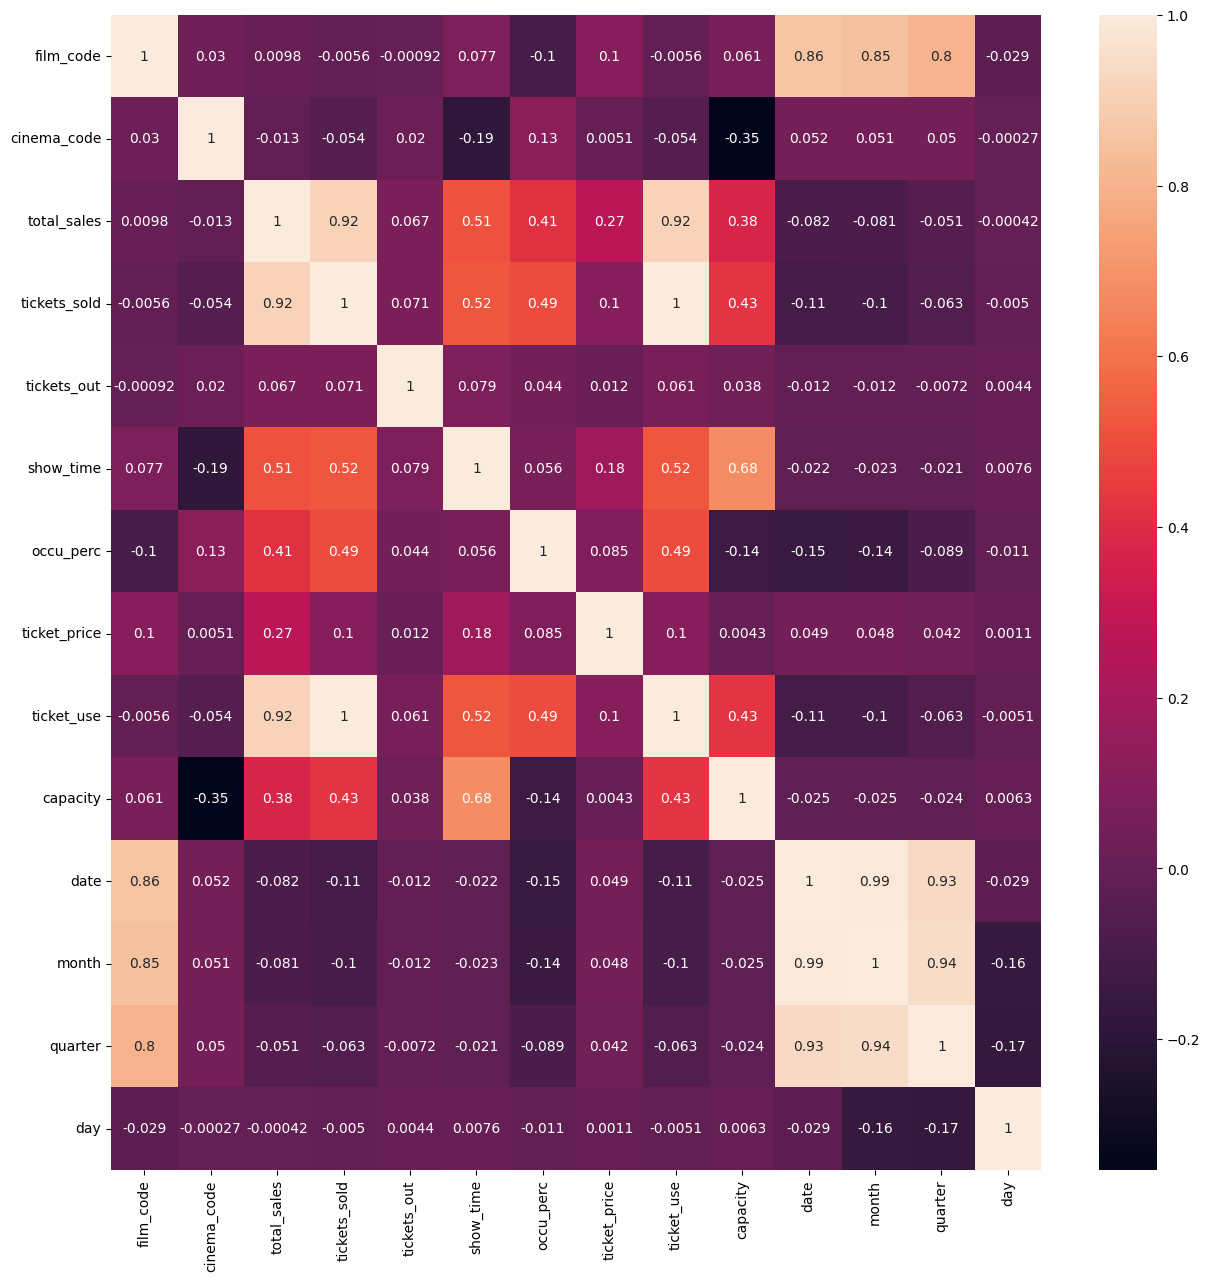

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
x = df[['ticket_price', 'occu_perc', 'show_time', 'tickets_sold','ticket_use','capacity']]
y = df['total_sales']
x
y

0         3900000
1         3360000
2         2560000
3         1200000
4         1200000
           ...   
142519    1320000
142520    1200000
142521    1060000
142522     600000
142523     250000
Name: total_sales, Length: 142524, dtype: int64

MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,ticket_price,occu_perc,show_time,tickets_sold,ticket_use,capacity
78401,60000.000000,31.25,3,195,195,624.000000
38308,150000.000000,17.01,3,75,75,440.917108
82965,118389.261745,22.07,6,596,596,2700.498414
57569,87000.000000,3.78,3,20,20,529.100529
15731,80000.000000,18.65,6,183,183,981.233244
...,...,...,...,...,...,...
110268,80000.000000,3.37,6,78,78,2314.540059
119879,120000.000000,46.81,2,44,44,93.997009
103694,120000.000000,49.21,8,312,312,634.017476
131932,73250.000000,17.65,2,60,60,339.943343


MODEL SELECTION

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([-3153578.62080601, 12088740.90556599,  6344551.86999217, ...,
       11507463.96609063, -1627272.92794237,  4800360.78114905])

EVALUATION

In [ ]:
print("R2_score is",r2_score(y_test,y_pred))

R2_score is 0.8759713333832502
